In [13]:
from matplotlib import pyplot as plt
import numpy as np
import random
import my_utils

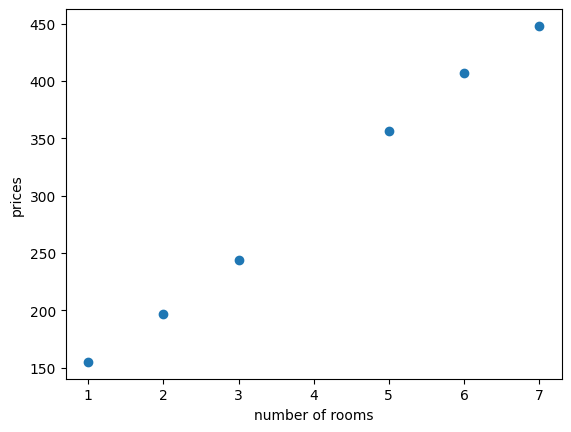

In [16]:
features = np.array([1,2,3,5,6,7])
labels = np.array([155, 197, 244, 356,407,448])
my_utils.plot_points(features, labels)

Tricks explained
Simple, Absolute, Square
Have doubts in Square especially modifying slope to get prediction close to data point

In [17]:
def simple_line_fit(base_price, price_per_room, num_rooms, price):
    small_eta_1 = random.random()*0.1
    small_eta_2 = random.random()*0.1
    predicted_price = base_price + price_per_room*num_rooms
    if(price > predicted_price and num_rooms > 0):
        price_per_room += small_eta_1
        base_price += small_eta_2
    if(price > predicted_price and num_rooms < 0):
        price_per_room -= small_eta_1
        base_price += small_eta_2
    if(price < predicted_price and num_rooms > 0):
        price_per_room -= small_eta_1
        base_price -= small_eta_2
    if(price < predicted_price and num_rooms < 0):
        price_per_room += small_eta_1
        base_price -= small_eta_2
    return price_per_room, base_price  

In [18]:
def absolute_line_fit(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    if(price > predicted_price):
        price_per_room += learning_rate*num_rooms
        base_price += learning_rate
    else:
        price_per_room -= learning_rate*num_rooms
        base_price += learning_rate
    return price_per_room, base_price

In [19]:
def square_line_fit(base_price, price_per_room, num_rooms, price, learning_rate):
    predicted_price = base_price + price_per_room*num_rooms
    price_per_room += learning_rate*num_rooms*(price - predicted_price)
    base_price += learning_rate*(price-predicted_price)
    return price_per_room, base_price

Running of linear Regression Algorithm:

Price per room: 51.04430678220095
Base price: 91.59448307644864


(51.04430678220095, 91.59448307644864)

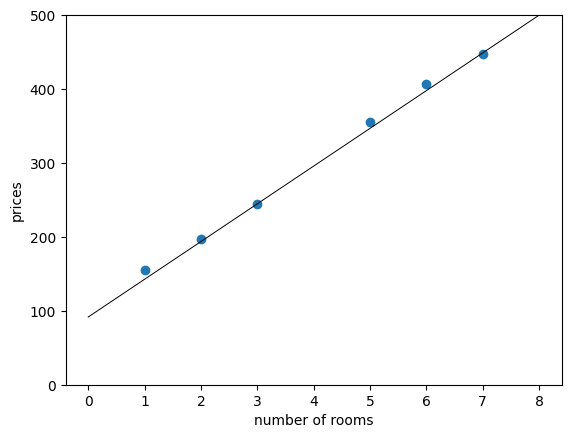

In [21]:
random.seed(0)
def linear_regression(features, labels, learning_rate=0.01, epochs = 1000):
    price_per_room = random.random()
    base_price = random.random()
    for epoch in range(epochs):
        # Uncomment any of the following lines to plot different epochs
        #if epoch == 1:
        #if epoch <= 10:
        #if epoch <= 50:
        #if epoch > 50:
        if True:
            my_utils.draw_line(price_per_room, base_price, starting=0, ending=8)
            i = random.randint(0, len(features)-1)
            num_rooms = features[i]
            price = labels[i]
            price_per_room, base_price = square_line_fit(base_price, price_per_room, num_rooms, price, learning_rate=learning_rate)
    my_utils.draw_line(price_per_room, base_price, 'black', starting=0, ending=8)
    my_utils.plot_points(features, labels)
    print('Price per room:', price_per_room)
    print('Base price:', base_price)
    return price_per_room, base_price
plt.ylim(0,500)
linear_regression(features, labels, learning_rate=0.01, epochs=1000)